In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import Counter

In [3]:
a_ce_dw = pd.read_csv('./magazine/final/a_ce_dw.csv', sep = '|', encoding = 'utf-8')
b_ce_dw = pd.read_csv('./magazine/final/b_ce_dw.csv', sep = '|', encoding = 'utf-8')
c_ce_dw = pd.read_csv('./magazine/final/c_ce_dw.csv', sep = '|', encoding = 'utf-8')
e_ce_dw = pd.read_csv('./magazine/final/e_ce_dw.csv', sep = '|', encoding = 'utf-8')
fb_ce_dw = pd.read_csv('./magazine/final/fb_ce_dw.csv', sep = '|', encoding = 'utf-8')
fn_ce_dw = pd.read_csv('./magazine/final/fn_ce_dw.csv', sep = '|', encoding = 'utf-8')
m_ce_dw = pd.read_csv('./magazine/final/m_ce_dw.csv', sep = '|', encoding = 'utf-8')
v_ce_dw = pd.read_csv('./magazine/final/v_ce_dw.csv', sep = '|', encoding = 'utf-8')
w_ce_dw = pd.read_csv('./magazine/final/w_ce_dw.csv', sep = '|', encoding = 'utf-8')

In [4]:
ce_dw = pd.concat([a_ce_dw, b_ce_dw, c_ce_dw, e_ce_dw, fb_ce_dw, fn_ce_dw, m_ce_dw, v_ce_dw, w_ce_dw])

In [5]:
ce_dw.reset_index(drop=True, inplace = True)

# 전처리

### 기호 삭제

In [112]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('[', '').str.replace(']', '').str.replace('\\', '').str.replace('"', '').str.replace("'", "").str.replace('「', '').str.replace('」', '')

## 브랜드 및 디자이너 이름 대체

### 에디 슬리먼, 에디 슬리만 -> 'HEDI-SLIMANE'으로 변경
에디슬리먼, 에디슬리만, 에디 슬리먼, 에디 슬리만

In [590]:
for word in ce_dw['word_celine']:
    if 'HEDI-SLIMANEe' in word:
        print(word)
        print('-'*50)

In [142]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('에디슬리먼', '에디-슬리먼').str.replace('에디 슬리먼', '에디-슬리먼').str.replace('에디슬리만', '에디-슬리먼').str.replace('에디 슬리만', '에디-슬리먼')

In [441]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('에디-슬리먼', 'HEDI-SLIMANE')

In [134]:
'Hedi Slimane'.upper()

'HEDI SLIMANE'

In [496]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('Hedi Sliman', 'HEDI-SLIMANE')

In [498]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('HediSlimane', 'HEDI-SLIMANE')

In [589]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('HEDI-SLIMANEe', 'HEDI-SLIMANE')

### 셀린, 셀린느, Celine, celine -> CELINE

In [561]:
for word in ce_dw['word_celine']:
    if 'Celine' in word:
        print(word)
        print('-'*50)

In [146]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('celine', 'CELINE').str.replace('Celine', 'CELINE').str.replace('셀린', 'CELINE').str.replace('셀린느', 'CELINE')

In [149]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('CELINE느', 'CELINE')

### 피비 파일로, 피비 필로 -> Phoebe-Philo

In [508]:
for word in ce_dw['word_celine']:
    if 'Phoebe Philo' in word:
        print(word)
        print('-'*50)

In [226]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('피비 파일로', '피비-파일로').str.replace('피비 필로', '피비-파일로')

In [270]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('피비필로', '피비-파일로')

In [271]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('피비', '피비-파일로')

In [273]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('피비-파일로-파일로', '피비-파일로')

In [318]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('피비-파일로' ,'Phoebe-Philo')

In [502]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('Phoebe-Philo' ,'PHOEBE-PHILO')

In [507]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('Phoebe Philo' ,'PHOEBE-PHILO')

In [501]:
'Phoebe-Philo'.upper()

'PHOEBE-PHILO'

### 오뜨 -> 오트
오뜨 -> 오트  
꾸띄르 -> 꾸뛰르   
쿠띄르 -> 쿠뛰르  
쿠틔르 -> 쿠튀르  

In [587]:
for word in ce_dw['word_celine']:
    if '쿠튀르' in word:
        print(word)
        print('-'*50)

 하지만 정작 현실에서 바비는 나의 패션 스타일에 단 1퍼센트의 영감도 주지 못했다. 예나 지금이나 리본 달린 블라우스, 러플 장식의 드레스, 벌룬 스커트와 같은 소위 ‘공주풍’ 옷들은 내 옷장 어느 한편도 차지한 적 없을 만큼 철저하게 외면당해왔으니 말이다.(물론 최근 바비들은 드레스를 넘어 꽤나 과감한 패션도 선보인다.) 그러던 중 이에 대해 어떤 깨달음을 느낀 순간이 찾아왔다. 바로 얼마 전 파리에서 열린 2019 S/S 빅터 앤 롤프 오트-꾸뛰르 쇼를 눈앞에서 목도하게 된 것. “I’m Not Shy. I Just Don’t Like You” 등과 같은 강렬한 메시지와 상반된 동화 같은 무드, 튤 소재를 아낌없이 사용한 거대한 실루엣의 쿠튀르 드레스들은 오프닝부터 피날레까지 한시도 눈을 뗄 수 없게 만들었다. 쉴 새 없이 쏟아져 나오는 오색빛깔 돌 드레스를 보니 자연스레 미소가 피어올랐다. 이건 CELINE이나 질 샌더 쇼를 보고 느끼는 충족감과는 전혀 다른 감정이었다. 내가 ‘입고’ 싶은 옷이 아닌, 내가 ‘보고’ 싶은 옷을 볼 때 느끼는 행복감이 존재했던 것이다.
--------------------------------------------------
 문화 역전 현상은 패션계에서 가장 노골적으로 목격된다. 기존에 하이엔드로 분류되던 브랜드들이 투박한 길거리의 미감을 차용하기 시작한 것이다. “우아함이란 게 과연 아직도 유효한가(I don’t think elegance is relevant).”라고 말한 뎀나 바잘리아의 베트멍부터 우아한 모노그램 패턴 위에 푸투라(Futura) 서체의 로고를 올려 전 세계를 발칵 뒤집어놓은 킴 존스의 ‘루이 비통 × 수프림’에 이르기까지, 확연히 다른 감성이 패션계를 잠식하고 있다. 이제 돈 많은 이들도 정교한 장인의 쿠튀르만을 고집하지 않는다. 집에 계시던 할머니가 냅다 잘라버렸다는 케이블 타이를 매단 채 버질 아블로를 입는다. 대학 교수들도 빗물로 트럭 방수천을 씻어 만든 프라이탁을 애호한다. 부자답게, 교수답

In [569]:
# ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('오뜨' ,'오트')

In [574]:
# ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('오트꾸띄르' ,'오트-꾸뛰르')

In [576]:
# ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('오트 꾸띄르' ,'오트-꾸뛰르')

In [578]:
# ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('오트 꾸뛰르' ,'오트-꾸뛰르')

In [580]:
# ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('오트 쿠튀르' ,'오트-꾸뛰르')

In [585]:
# ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('오트쿠튀르' ,'오트-꾸뛰르')

In [593]:
# ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('오트쿠튀르' ,'오트-꾸뛰르')

In [594]:
ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('오트-꾸뛰르' ,'HAUTE-COUTURE')

In [591]:
'Haute-Couture'.upper()

'HAUTE-COUTURE'

### stopwords

In [595]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [596]:
sw_df = pd.read_csv('stopword.txt', header=None)

In [597]:
sw_df.columns = ['stopword']

In [598]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [599]:
stop_words[:10]

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']

## list 생성 후 append

In [600]:
contents_list = []

In [601]:
len(ce_dw)

826

In [602]:
# ce_dw['word_celine']

In [603]:
magazine_list = []
article_list = []
for word in ce_dw['word_celine']:
    article_list.append(word)

In [604]:
len(article_list)

826

In [605]:
article_list[120]

' 두세 개의 가방을 한 번에 믹스하는 백 레이어링의 시너지 효과는 실로 대단하다. 개인적으로 이번 시즌 위시 리스트 중 하나인 CELINE의 PVC 백을 실제로 접한 뒤 백 레이어링 효과에 더욱 확신을 가지게 되었다.(사실 이 PVC 백은 지갑을 사면 ‘덤’으로 주는 용도이긴 하나 역으로 이 백이 인기가 더 좋다.) 촬영장에 홀로 덩그러니 놓인 PVC 백을 보고 있자니 아무리 CELINE이라 한들, 팥 빠진 찐빵 같다란 생각이 들었으니. PVC 백 특유의 ‘칩함’은 CELINE이 쇼에서 제안했던 ‘속에 담긴 지갑, 함께 쥐어진 클래식한 토트백’에 의해 시너지 효과를 이끌어내며 드라마틱한 존재감을 발휘한 것이다. 이런 백 레이어링 방식은 이번 시즌 CELINE 우먼만의 세련된 감각을 발휘하는 용도로 적극 활용되었다.,  이 트렌드에 힘을 실어주는 또 다른 대표적인 디자이너는 칼 라거펠트. 동일한 체인 백을 양쪽에 크로스로 메거나(2014 S/S 샤넬), 토트백 위에 미니 백을 참처럼 다는(2015 S/S 펜디) 등 그는 이미 여러 시즌에 걸쳐 백 레이어링을 다양하게 제안한 바 있다. 특히 이번 시즌엔 PVC 군단과 함께 흥미로운 백 레이어링 팁이 런웨이 내내 이어지기도. 체인 백과 PVC 쇼퍼 백을 한 손에 겹쳐 들거나, 크로스로 연출한 체인 백과 패딩 백, 로고가 담긴 클러치를 팔에 끼고 빅 토트백은 손에 드는 등 스포티하거나 캐주얼한 가방들이 샤넬을 대표하는 체인 백과 함께 덩달아 신분 상승하는 효과를 가지고 왔다. CELINE과 샤넬에서 보여준 이질적인 무드의 백과 백의 과감한 믹스 매치는 그 자체만으로 룩에 파워풀함과 위트를 더해주는 역할을 한다.(브랜드에겐 분명 상업적인 효과도 있을 테고.) 로에베, 구찌, 카르벤, 마크 제이콥스 등 수많은 쇼들 역시 이를 뒷받침한다.'

### 기호 삭제

In [606]:
# import re

# for article in article_list:
#     article_list2 = re.sub('[^\w\s]', '', article)

# # article_list[100].replace(' \', '')

In [607]:
article_list[400].replace('"', '').replace("'", "").replace('[', '').replace(']', '').replace('\\', '')

'마지막 왕실 일정을 수행하기 위해 잠시 영국으로 돌아온 메건 마클이 지난 6일(현지 시간) 영국 동부 다겐햄에 있는 로버트 클락 어퍼 스쿨을 전격 방문, 시크한 커리어 우먼룩을 선보여 주목을 받았다., 이날 700여 명의 학생들과 네 인생의 여자를 지키라는 주제의 토론을 진행한 메건 마클은 앞으로 왕실 일원이 아닌 여성 인권과 기후 변화 운동에 앞장서는 여성 활동가 이미지에 맞게 블랙 팬츠와 크림색 재킷을 착용했다., 특히 메건 마클은 나비 리본 탑 핸들로 마무리한 한국의 전통 보자기를 닮은 레지나 표(Rejina Pyo) 클러치 백을  매치해 눈길을 끌었다., ↑사진 = 메건 마클이 착용한 표지영 디자이너의 레지나 표 클러치백, 레지나 표는 한국 출신 표지영 디자이너가 전개하는 여성복 브랜드로 런던을 기반으로 활동하고 있다.표지영 디자이너는 삼성패션디자인펀드 제13회, 14회 2년연속 수상자로 선정된 바 있으며 지난해 런던 2019 패션 어워즈에서 여성복 신인상을 수상하면서 세계 패션계의 주목을 받고 있다., 표지영 디자이너는 홍익대학교 섬유미술패션디자인과를 졸업하고 국내 패션 회사에서 근무하다 지난 2007년 영국 센트럴 세인트 마틴에서 여성복 석사 과정을 마쳤다. CELINE, 록산다 등에서 거리어를 쌓았으며 지난 2014 F/W시즌 ‘레지나 표(Rejina Pyo)’를 런칭했다.'

## Hannanum


In [608]:
from konlpy.tag import Hannanum

In [609]:
hannanum = Hannanum()

### 각 문장별로 형태소 구분하기

In [610]:
sentences_tag = []

for sentence in article_list:
    morph = hannanum.pos(sentence)
    sentences_tag.append(morph)
    
    

print(len(sentences_tag))


826


In [611]:
sentences_tag[110]

[('슈퍼사이즈', 'N'),
 ('리본', 'N'),
 ('의', 'J'),
 ('등장', 'N'),
 ('!', 'S'),
 ('이번', 'N'),
 ('시즌', 'N'),
 ('여성', 'N'),
 ('의', 'J'),
 ('특권', 'N'),
 ('이', 'J'),
 ('자', 'E'),
 ('사랑', 'N'),
 ('스럽', 'X'),
 ('음', 'E'),
 ('의', 'J'),
 ('대명사', 'N'),
 ('이', 'J'),
 ('ㄴ', 'E'),
 ('리본', 'N'),
 ('장식', 'N'),
 ('이', 'J'),
 ('런웨이', 'N'),
 ('를', 'J'),
 ('로맨틱', 'N'),
 ('하', 'X'),
 ('게', 'E'),
 ('채우', 'P'),
 ('어', 'E'),
 ('나', 'P'),
 ('아', 'E'),
 ('가', 'P'),
 ('아다', 'E'),
 ('.', 'S'),
 ('CELINE', 'F'),
 ('의', 'J'),
 ('오프닝', 'N'),
 ('을', 'J'),
 ('장식', 'N'),
 ('하', 'X'),
 ('ㄴ', 'E'),
 ('도트', 'N'),
 ('패턴', 'N'),
 ('의', 'J'),
 ('보', 'N'),
 ('원피스', 'N'),
 ('부터', 'J'),
 ('발렌티노,', 'N'),
 ('미우', 'N'),
 ('미우,', 'N'),
 ('에르뎀,', 'N'),
 ('모스키노,', 'N'),
 ('에밀리아', 'N'),
 ('윅스테드', 'N'),
 ('를', 'J'),
 ('대표적', 'N'),
 ('으로', 'J'),
 ('꼽', 'P'),
 ('을', 'E'),
 ('수', 'N'),
 ('있', 'P'),
 ('다', 'E'),
 ('.', 'S'),
 ('단', 'M'),
 (',', 'S'),
 ('그저', 'M'),
 ('사랑', 'N'),
 ('스럽', 'X'),
 ('게', 'E'),
 ('리본', 'N'),
 ('을', 'J'),
 ('즐기기보단', 'N')

## 한나눔 태그 집합
기호 `S`  
외국어 `F`  
체언 `N`  
용언 `P`
> 동사 `PV`
형용사 `PA`
보조용언 `PX`

수식언 `M`  
>관형사 `MM`
부사 `MA`

...

In [612]:
hannanum.tagset

{'E': '어미',
 'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ET': '전성 어미',
 'F': '외국어',
 'I': '독립언',
 'II': '감탄사',
 'J': '관계언',
 'JC': '격조사',
 'JP': '서술격 조사',
 'JX': '보조사',
 'M': '수식언',
 'MA': '부사',
 'MM': '관형사',
 'N': '체언',
 'NB': '의존명사',
 'NC': '보통명사',
 'NN': '수사',
 'NP': '대명사',
 'NQ': '고유명사',
 'P': '용언',
 'PA': '형용사',
 'PV': '동사',
 'PX': '보조 용언',
 'S': '기호',
 'X': '접사',
 'XP': '접두사',
 'XS': '접미사'}

### stop_words 추가

In [613]:
stop_words[0]

'아'

### 1. 명사(N), 용언(P), 수식언(M)인 품사만 선별해 리스트에 담기

In [614]:
NPM_list= []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if word not in stop_words:
            if tag in ['N','P','M','F']:
                NPM_list.append(word)

In [615]:
len(NPM_list)

70667

In [616]:
NPM_list[60:70]

['부츠', '가격미정', '폴', '랄프', '로렌(Polo', 'Ralph', 'Lauren', '빈티지한', '주름', '워싱']

### 선별된 품사별 빈도수 계산 & 상위 빈도 10위까지 출력

In [617]:
word_list = Counter(NPM_list)
print(word_list.most_common(200))

[('CELINE', 1639), ('있', 1114), ('지', 556), ('SLIMANE', 503), ('HEDI', 498), ('보', 475), ('수', 458), ('컬렉션', 399), ('브랜드', 397), ('룩', 333), ('선보이', 319), ('패션', 304), ('말', 299), ('되', 285), ('주', 281), ('시즌', 280), ('PHILO', 265), ('PHOEBE', 262), ('않', 246), ('입', 233), ('디자이너', 226), ('백', 221), ('새롭', 217), ('컬러', 216), ('없', 212), ('보이', 211), ('내', 211), ('같', 209), ('만들', 209), ('지나', 206), ('디렉터', 199), ('스타일', 194), ('위하', 183), ('디자인', 182), ('재킷', 180), ('드레스', 180), ('팬츠', 173), ('쇼', 173), ('가장', 171), ('받', 166), ('생', 165), ('남성복', 164), ('장식', 160), ('좋', 145), ('아이템', 145), ('파리', 144), ('옷', 141), ('코트', 137), ('더', 137), ('크리에이티브', 136), ('많', 135), ('크', 134), ('여성', 133), ('매치', 131), ('S', 130), ('로랑', 129), ('싶', 128), ('그녀', 127), ('느끼', 126), ('첫', 124), ('등장', 123), ('로고', 122), ('소재', 122), ('역시', 122), ('가격미정', 120), ('LVMH', 119), ('거', 119), ('가죽', 117), ('두', 117), ('바', 116), ('더하', 115), ('시작', 111), ('전', 110), ('실루엣', 107), ('통하', 104), ('영국', 103), 

In [618]:
# 한 글자인 단어는 제외

for i, v in enumerate(NPM_list):
    if len(v)<2:
        NPM_list.pop(i)

In [619]:
count = Counter(NPM_list)

In [620]:
word_list = count.most_common(200)
# for v in word_list:
#     print(v)

### 2. 명사만 선별해 리스트에 담기

In [621]:
noun= []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if word not in stop_words:
            if tag in ['N', 'F']:
                noun.append(word)

In [622]:
for i, v in enumerate(noun):
    if len(v)<2:
        noun.pop(i)

In [623]:
counts = Counter(noun)

### 3. 명사만 선별해 아티클 별로 리스트에 담기

In [624]:
noun_article= []
for sentence1 in sentences_tag:
    art_noun = []
    for word, tag in sentence1:
        if word not in stop_words:
            if tag in ['N', 'F']:
                art_noun.append(word)
    noun_article.append(art_noun)

print(len(noun_article))

826


In [625]:
len(article_list)

826

In [626]:
noun_df = pd.DataFrame({
    'article':article_list,
    'noun':noun_article
})

In [627]:
w_list = noun_df['noun']

In [628]:
for i in range(len(w_list)):
    for idx, v in enumerate(w_list[i]):
        if len(v)<2:
            w_list[i].pop(idx)

In [629]:
w_list[0]

['골드',
 '장식',
 '포인트',
 '케이프',
 '체크',
 '코트',
 '1백9만원',
 '산드로(Sandro)',
 '데님',
 '팬츠',
 '가격미정',
 '리바이스(Levi’s)',
 '그레이',
 '컬러',
 '니트',
 '13만2천원',
 '르누이(Le',
 'Nuee',
 '라이딩',
 '부츠',
 '2백26만원',
 '발렌티노',
 '가라바',
 '줄무늬',
 '포인트',
 '8만5천원',
 '프레드',
 '페리(Fred',
 'Perry',
 '로고',
 '패턴',
 '가격미정',
 'CELINE',
 '벨벳',
 '소재',
 '후드',
 '코트',
 '레이스',
 '아플리케',
 '디테일',
 '자카드',
 '소재',
 '스커트',
 '원석',
 '네크리스',
 '가격미정',
 'CELINE',
 'CELINE',
 '반무테',
 '안경',
 '33만원',
 '젠틀몬스터(Gentle',
 'Monster',
 '앵클',
 '부츠',
 '가격미정',
 '랄프',
 '로렌(Polo',
 'Ralph',
 'Lauren']

In [630]:
noun_df.to_csv('noun_celine_Hannanum.csv', sep = '|', index = False, encoding = 'utf-8')

In [631]:
noun_df

,article,noun
0,"골드 잠금 장식으로 포인트를 준 케이프 체크 코트는 1백9만원, 산드로(Sandro...","[골드, 장식, 포인트, 케이프, 체크, 코트, 1백9만원, 산드로(Sandro),..."
1,"빈티지한 주름과 워싱이 특징인 데님 팬츠는 가격미정, CELINE(CELINE).","[빈티지한, 주름, 워싱, 특징, 데님, 팬츠, 가격미정, CELINE, CELINE]"
2,1970년대 에스닉한 분위기가 물씬 풍기는 CELINE의 방패 모양 숄더백.,"[1970년대, 에스닉한, 분위기, CELINE, 방패, 모양, 숄더백]"
3,"재킷, 셔츠, 슈즈는 CELINE(CELINE), 블랙 스커트는 렉토, 이어링은 스...","[재킷, 셔츠, 슈즈, CELINE, CELINE, 블랙, 스커트, 렉토,, 이어링..."
4,"재킷, 셔츠, 네크리스는 모두 CELINE(CELINE), 팬츠는 다잉브리드, 슈즈...","[재킷, 셔츠, 네크리스, CELINE, CELINE, 팬츠, 다잉브리드,, 슈즈,..."
5,"CELINE, 나노 벨트백 1백만원대","[CELINE, 나노, 벨트백, 1백만원]"
6,요즘 들어 주식은 친구들과의 대화에서 빼놓을 수 없는 주제가 되었다. 코로나19...,"[주식, 친구들, 대화, 주제, 코로나19, 불안감, 기회, 강조, 주식, 시작, ..."
7,"컬러블록이 조화로운 부츠는 가격미정, 샤넬(Chanel). 와인색 니하이 부츠는...","[컬러블록, 조화로운, 부츠, 가격미정, 샤넬(Chanel), 와인색, 니하, 부츠..."
8,"격자무늬 트렌치코트는 4백26만5천원, 와이드 팬츠는 가격미정, 지방시. 밤색 터틀...","[격자무늬, 트렌치코트, 4백26만5천원, 와이드, 팬츠, 가격미정, 지방시, 밤색..."
9,"민트색 후드 톱은 가격미정, 크롬하츠(Chrome Hearts). 안경은 52만원,...","[민트색, 후드, 가격미정, 크롬하츠(Chrome, Hearts, 안경, 52만원,..."


In [632]:
noun_df.loc[860:865]

,article,noun


### 명사빈도 카운트

In [633]:
noun_list = counts.most_common(200)
for v in noun_list:
    print(v)

('CELINE', 1639)
('SLIMANE', 503)
('HEDI', 498)
('컬렉션', 399)
('브랜드', 397)
('패션', 304)
('시즌', 280)
('PHILO', 265)
('PHOEBE', 262)
('디자이너', 226)
('컬러', 216)
('디렉터', 199)
('스타일', 194)
('디자인', 182)
('재킷', 180)
('드레스', 180)
('팬츠', 173)
('남성복', 164)
('장식', 160)
('아이템', 145)
('파리', 144)
('코트', 137)
('크리에이티브', 136)
('여성', 133)
('로랑', 129)
('매치', 127)
('그녀', 127)
('등장', 123)
('로고', 122)
('소재', 122)
('가격미정', 120)
('LVMH', 119)
('가죽', 117)
('시작', 111)
('실루엣', 107)
('영국', 103)
('셔츠', 102)
('때문', 102)
('럭셔리', 97)
('블랙', 95)
('연출', 95)
('버버리', 94)
('여름', 94)
('가방', 91)
('런웨이', 91)
('매장', 90)
('2019', 89)
('스커트', 87)
('그룹', 86)
('디올', 85)
('모델', 85)
('주목', 84)
('트렌드', 84)
('데님', 81)
('사랑', 81)
('변화', 80)
('rnrn', 80)
('무드', 79)
('부츠', 78)
('패션쇼', 78)
('지방시', 77)
('프린트', 77)
('패션계', 77)
('사람', 76)
('제품', 76)
('패턴', 75)
('화이트', 74)
('캠페인', 73)
('시대', 72)
('생각', 72)
('남성', 72)
('액세서리', 71)
('정도', 70)
('완성', 70)
('영감', 69)
('디자이너들', 69)
('여성복', 67)
('피부', 66)
('이미지', 65)
('에디', 65)
('패션위크', 65)
('분위기', 6

## 워드클라우드 만들기

In [634]:

import matplotlib.pyplot as plt

### 패키지 및 폰트 설치

In [635]:
import matplotlib.font_manager as fm

# # 이용 가능한 폰트 중 '고딕'만 선별
# for font in fm.fontManager.ttflist:
#     if 'Gothic' in font.name:
#         print(font.name, font.fname)

In [636]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### wordcloud 그리기

In [637]:
from wordcloud import WordCloud

In [638]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

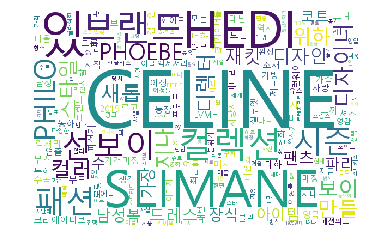

In [639]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('hannanum_adj_noun_celine.png')

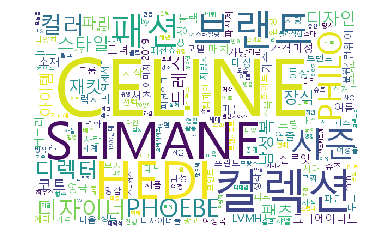

In [640]:
wc.generate_from_frequencies(dict(noun_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()

wc.to_file('hannanum_noun_celine.png')